In [1]:
from data_loader__ import *
from data_plotter__ import *
import pandas as pd
from sklearn.model_selection import train_test_split
PATH='data/'

x scale factor is  0.25830258302583026
y scale factor is  0.4728132387706856
xy after scale  523 1585
xy after scale  494 1338
xy after scale  462 987
xy after scale  474 375
xy after scale  458 944


<Figure size 640x480 with 1 Axes>

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/sample_submission.csv')

df_train, df_dev = train_test_split(train, test_size=0.1, random_state=63)
df_test = test

# Create dataset objects

train_images_dir = PATH + 'train_images/{}.jpg'
test_images_dir = PATH + 'test_images/{}.jpg'

train_dataset = CarDataset(df_train, train_images_dir)
dev_dataset = CarDataset(df_dev, train_images_dir)
test_dataset = CarDataset(df_test, test_images_dir)
# print(df_train.values[0])

BATCH_SIZE = 4

# Create data generators - they will produce batches
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
dev_loader = DataLoader(dataset=dev_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader

In [3]:
# n_rows = 6

# for idx in range(n_rows):
#     fig, axes = plt.subplots(1, 2, figsize=(20,20))
#     img = imread(PATH + 'train_images/' + train['ImageId'].iloc[idx] + '.jpg')
#     axes[0].imshow(img)
#     img_vis = visualize(img, str2coords(train['PredictionString'].iloc[idx]))
#     axes[1].imshow(img_vis)
#     plt.show()
img0 = imread(PATH + 'train_images/' + train['ImageId'][0] + '.jpg')
labels =train['PredictionString'][0]


def _regr_preprocess(regr_dict):
    for name in ['x', 'y', 'z']:
        regr_dict[name] = regr_dict[name] / 100
    regr_dict['roll'] = rotate(regr_dict['roll'], np.pi)
    regr_dict['pitch_sin'] = sin(regr_dict['pitch'])
    regr_dict['pitch_cos'] = cos(regr_dict['pitch'])
    regr_dict.pop('pitch')
    regr_dict.pop('id')
    return regr_dict
# mask, regr = get_mask_and_regr(img0, train['PredictionString'][0])

img_orginal=img0
img = preprocess_image(img0)

x_scale=float(img.shape[0])/img_orginal.shape[0]
y_scale=float(img.shape[1])/img_orginal.shape[1]

print('x scale factor is ', x_scale)
print('y scale factor is ', y_scale)

mask = np.zeros([IMG_HEIGHT , IMG_WIDTH ], dtype='float32')
regr_names = ['x', 'y', 'z', 'yaw', 'pitch', 'roll']
regr = np.zeros([IMG_HEIGHT , IMG_WIDTH , 7], dtype='float32')

coords = str2coords(labels)
xs, ys = get_img_coords(labels)

# [IMG_HEIGHT // MODEL_SCALE, IMG_WIDTH , 7]
# img.shape
for x, y, regr_dict in zip(xs, ys, coords):
    x, y = y, x
    print('before',x,y)
    x = int(np.round(x * x_scale))
    x = np.round(x).astype('int')
    y = int(np.round(y * y_scale))
    print('After',x,y)

    if x >= 0 and x < IMG_HEIGHT  and y >= 0 and y < IMG_WIDTH :
        mask[x-5:x+5, y-5:y+5] = 1
        regr_dict = _regr_preprocess(regr_dict)
        regr[x-5:x+5, y-5:y+5] = [regr_dict[n] for n in sorted(regr_dict)]
        

# coords[1]['x']
sorted(regr_dict)

x scale factor is  0.25830258302583026
y scale factor is  0.4728132387706856
before 2024.5538559538193 3351.615316840597
After 523 1585
before 1911.3711318429566 2830.6254466522373
After 494 1338
before 1787.8256926487913 2086.7606796898276
After 462 987
before 1833.8621604374723 792.4754521073514
After 474 375
before 1774.5031632105354 1996.9565625541156
After 458 944


['pitch_cos', 'pitch_sin', 'roll', 'x', 'y', 'yaw', 'z']

img0.shape (2710, 3384, 3) std: 86.78172682047031
img.shape (700, 1600, 3) std: 0.33989477
mask.shape (700, 1600) std: 0.021124128
regr.shape (700, 1600, 7) std: 0.0089329


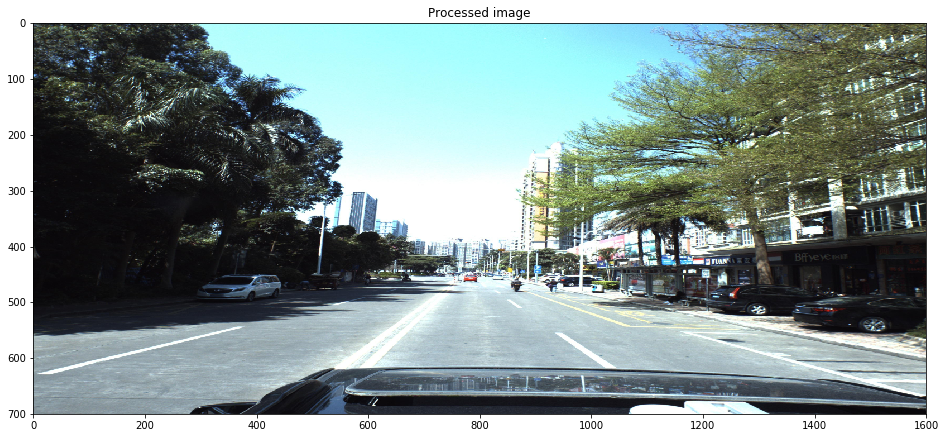

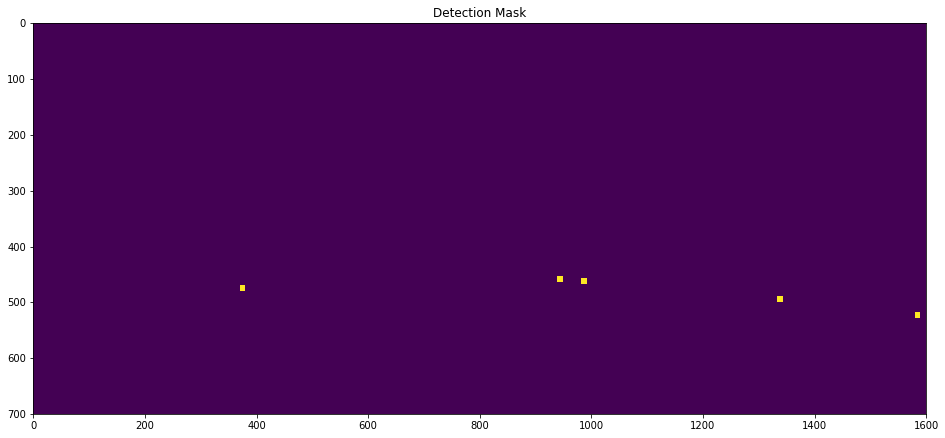

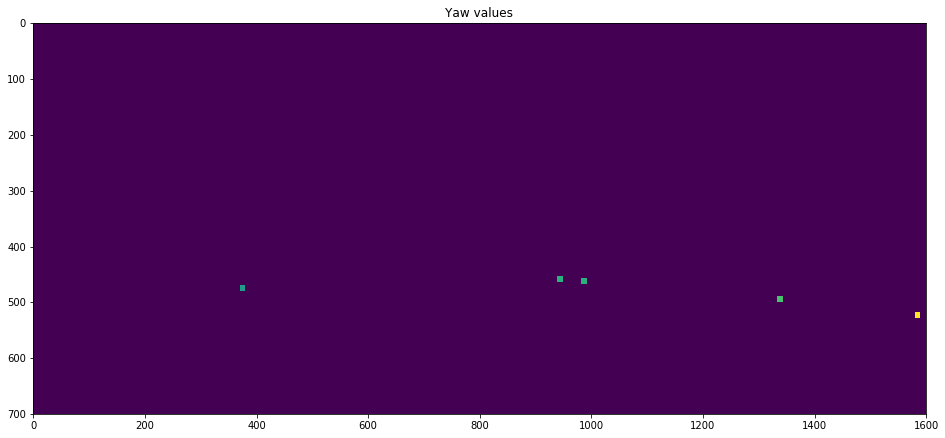

In [4]:
print('img0.shape', img0.shape, 'std:', np.std(img0))
print('img.shape', img.shape, 'std:', np.std(img))
print('mask.shape', mask.shape, 'std:', np.std(mask))
print('regr.shape', regr.shape, 'std:', np.std(regr))

plt.figure(figsize=(16,16))
plt.title('Processed image')
plt.imshow(img)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Detection Mask')
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Yaw values')
plt.imshow(regr[:,:,-2])
plt.show()

x scale factor is  0.25830258302583026
y scale factor is  0.4728132387706856
xy after scale  523 1585
xy after scale  494 1338
xy after scale  462 987
xy after scale  474 375
xy after scale  458 944
img0.shape (2710, 3384, 3) std: 86.78172682047031
img.shape (700, 1600, 3) std: 0.33989477
mask.shape (700, 1600) std: 0.021124128
regr.shape (700, 1600, 7) std: 0.0089329


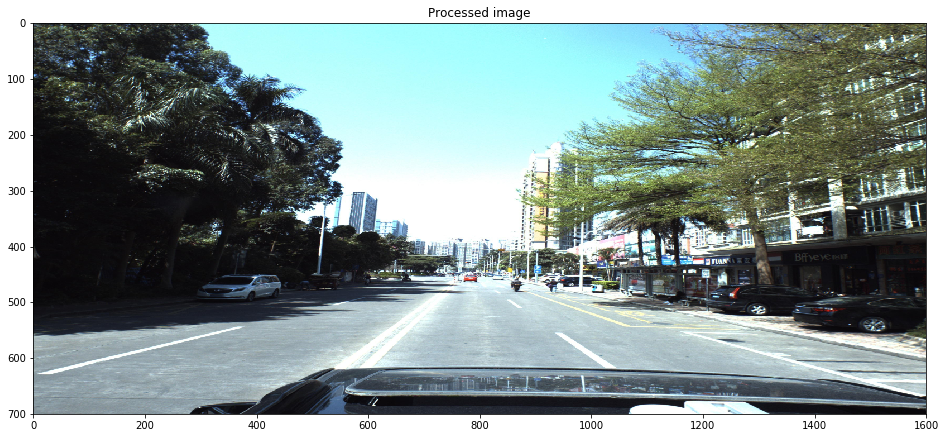

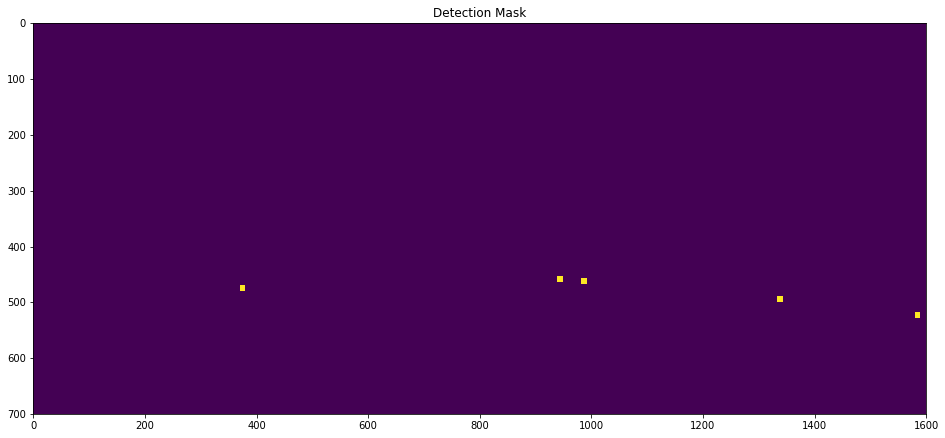

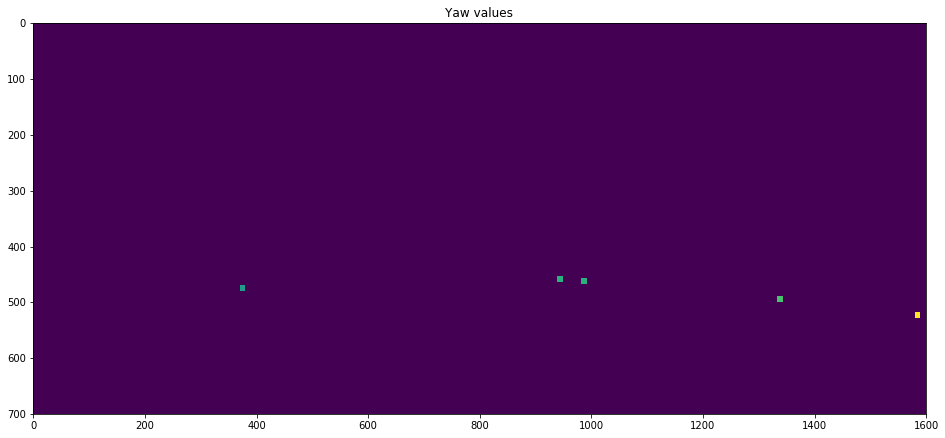

In [5]:

img0 = imread(PATH + 'train_images/' + train['ImageId'][0] + '.jpg')


mask, regr = get_mask_and_regr(img0, train['PredictionString'][0])

print('img0.shape', img0.shape, 'std:', np.std(img0))
print('img.shape', img.shape, 'std:', np.std(img))
print('mask.shape', mask.shape, 'std:', np.std(mask))
print('regr.shape', regr.shape, 'std:', np.std(regr))

plt.figure(figsize=(16,16))
plt.title('Processed image')
plt.imshow(img)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Detection Mask')
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Yaw values')
plt.imshow(regr[:,:,-2])
plt.show()

In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/sample_submission.csv')

df_train, df_dev = train_test_split(train, test_size=0.1, random_state=63)
df_test = test

# Create dataset objects

train_images_dir = PATH + 'train_images/{}.jpg'
test_images_dir = PATH + 'test_images/{}.jpg'

train_dataset = CarDataset(df_train, train_images_dir)
dev_dataset = CarDataset(df_dev, train_images_dir)
test_dataset = CarDataset(df_test, test_images_dir)
# print(df_train.values[0])

BATCH_SIZE = 4

# Create data generators - they will produce batches
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
dev_loader = DataLoader(dataset=dev_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader

x scale factor is  0.25830258302583026
y scale factor is  0.4728132387706856
xy after scale  491 809
xy after scale  495 1232
xy after scale  455 751
xy after scale  455 801
xy after scale  452 837
xy after scale  472 355
xy after scale  455 297
xy after scale  454 422
xy after scale  454 576
xy after scale  453 872
xy after scale  450 867
xy after scale  453 736
xy after scale  452 702
xy after scale  450 199
xy after scale  440 293
xy after scale  458 1138
xy after scale  461 1177


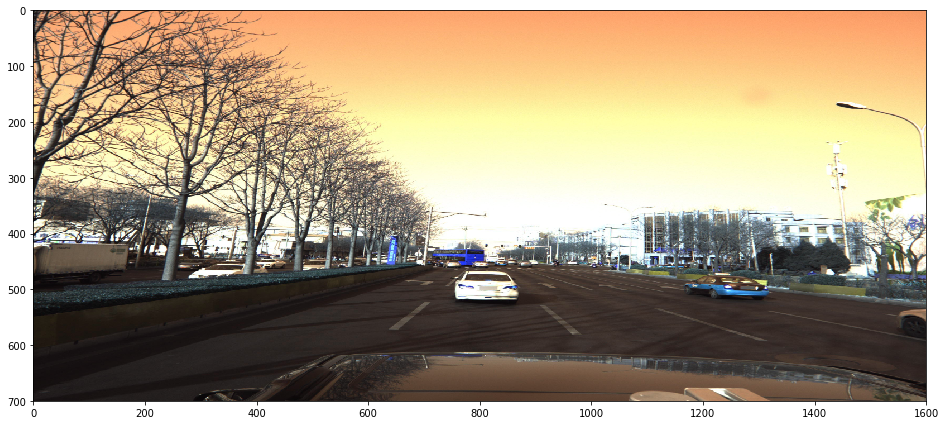

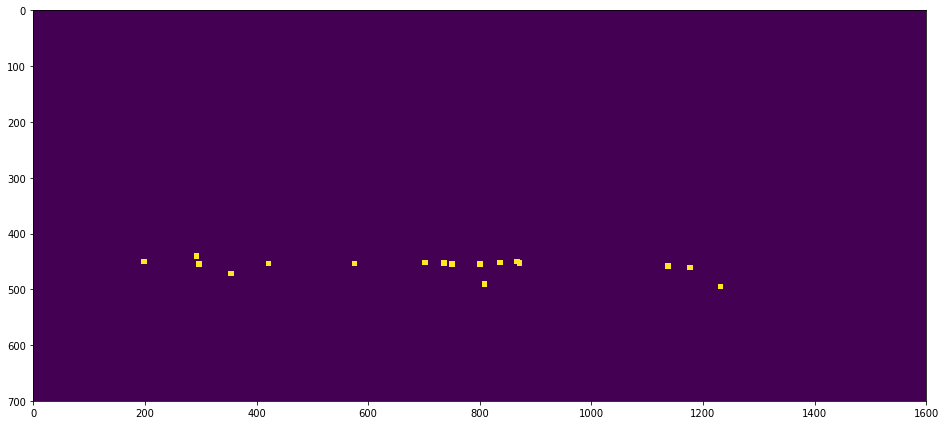

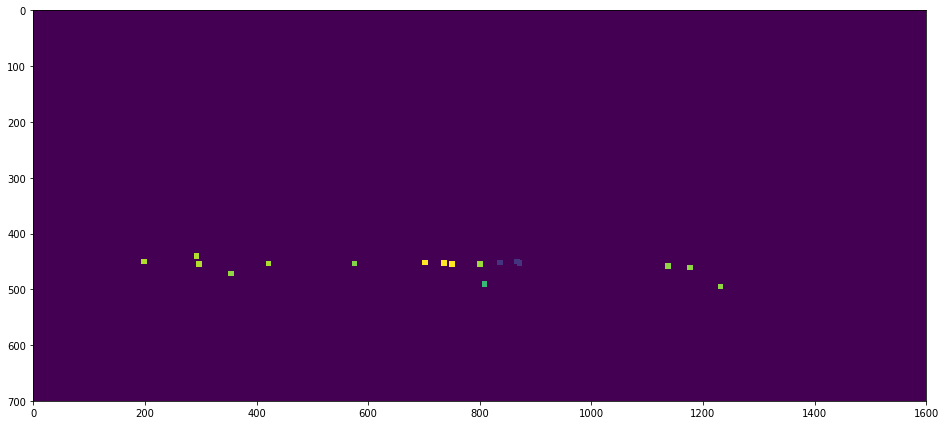

In [7]:
img, mask, regr = train_dataset[1]

plt.figure(figsize=(16,16))
plt.imshow(np.rollaxis(img, 0, 3))
plt.show()

plt.figure(figsize=(16,16))
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,16))
plt.imshow(regr[-2])
plt.show()

In [8]:
# !pip install efficientnet_pytorch

In [9]:
from efficientnet_pytorch import EfficientNet
import torch.nn as nn
import  torch.optim as optim 
import torch.optim.lr_scheduler as lr_scheduler
from tqdm import tqdm 

n_epochs = 1



In [10]:
class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x

class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        #  would be a nice idea if the upsampling could be learned too,
        #  but my machine do not have enough memory to handle all those weights
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch//2, in_ch//2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2=None):
        x1 = self.up(x1)
        
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX//2,
                        diffY // 2, diffY - diffY//2))
        
        # for padding issues, see 
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        
        if x2 is not None:
            x = torch.cat([x2, x1], dim=1)
        else:
            x = x1
        x = self.conv(x)
        return x

def get_mesh(batch_size, shape_x, shape_y):
    mg_x, mg_y = np.meshgrid(np.linspace(0, 1, shape_y), np.linspace(0, 1, shape_x))
    mg_x = np.tile(mg_x[None, None, :, :], [batch_size, 1, 1, 1]).astype('float32')
    mg_y = np.tile(mg_y[None, None, :, :], [batch_size, 1, 1, 1]).astype('float32')
    mesh = torch.cat([torch.tensor(mg_x).to(device), torch.tensor(mg_y).to(device)], 1)
    return mesh

In [11]:
class MyUNet(nn.Module):
    '''Mixture of previous classes'''
    def __init__(self, n_classes):
        super(MyUNet, self).__init__()
        self.base_model = EfficientNet.from_pretrained('efficientnet-b0')
        
        self.conv0 = double_conv(5, 64)
        self.conv1 = double_conv(64, 128)
        self.conv2 = double_conv(128, 512)
        self.conv3 = double_conv(512, 1024)
        
        self.mp = nn.MaxPool2d(2)
        
        self.up1 = up(1282 + 1024, 512)
        self.up2 = up(512 + 512, 256)
        self.outc = nn.Conv2d(256, n_classes, 1)

    def forward(self, x):
        batch_size = x.shape[0]
        mesh1 = get_mesh(batch_size, x.shape[2], x.shape[3])
        x0 = torch.cat([x, mesh1], 1)
        x1 = self.mp(self.conv0(x0))
        x2 = self.mp(self.conv1(x1))
        x3 = self.mp(self.conv2(x2))
        x4 = self.mp(self.conv3(x3))
        
        x_center = x[:, :, :, IMG_WIDTH // 8: -IMG_WIDTH // 8]
        feats = self.base_model.extract_features(x_center)
        bg = torch.zeros([feats.shape[0], feats.shape[1], feats.shape[2], feats.shape[3] // 8]).to(device)
        feats = torch.cat([bg, feats, bg], 3)
        
        # Add positional info
        mesh2 = get_mesh(batch_size, feats.shape[2], feats.shape[3])
        feats = torch.cat([feats, mesh2], 1)
        
        x = self.up1(feats, x4)
        x = self.up2(x, x3)
        x = self.outc(x)
        return x

In [12]:
# Gets the GPU if there is one, otherwise the cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)



model = MyUNet(8).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=max(n_epochs, 10) * len(train_loader) // 3, gamma=0.1)

cuda
Loaded pretrained weights for efficientnet-b0


In [13]:
def criterion(prediction, mask, regr, size_average=True):
    # Binary mask loss
    pred_mask = torch.sigmoid(prediction[:, 0])
#     mask_loss = mask * (1 - pred_mask)**2 * torch.log(pred_mask + 1e-12) + (1 - mask) * pred_mask**2 * torch.log(1 - pred_mask + 1e-12)
    mask_loss = mask * torch.log(pred_mask + 1e-12) + (1 - mask) * torch.log(1 - pred_mask + 1e-12)
    mask_loss = -mask_loss.mean(0).sum()
    
    # Regression L1 loss
    pred_regr = prediction[:, 1:]
    regr_loss = (torch.abs(pred_regr - regr).sum(1) * mask).sum(1).sum(1) / mask.sum(1).sum(1)
    regr_loss = regr_loss.mean(0)
    
    # Sum
    loss = mask_loss + regr_loss
    if not size_average:
        loss *= prediction.shape[0]
    return loss

In [14]:
def train_model(epoch, history=None):
    model.train()

    for batch_idx, (img_batch, mask_batch, regr_batch) in enumerate(tqdm(train_loader)):
        img_batch = img_batch.to(device)
        mask_batch = mask_batch.to(device)
        regr_batch = regr_batch.to(device)
        
        optimizer.zero_grad()
        output = model(img_batch)
        loss = criterion(output, mask_batch, regr_batch)
        if history is not None:
            history.loc[epoch + batch_idx / len(train_loader), 'train_loss'] = loss.data.cpu().numpy()
        
        loss.backward()
        
        optimizer.step()
        exp_lr_scheduler.step()
    
    print('Train Epoch: {} \tLR: {:.6f}\tLoss: {:.6f}'.format(
        epoch,
        optimizer.state_dict()['param_groups'][0]['lr'],
        loss.data))

def evaluate_model(epoch, history=None):
    model.eval()
    loss = 0
    
    with torch.no_grad():
        for img_batch, mask_batch, regr_batch in dev_loader:
            img_batch = img_batch.to(device)
            mask_batch = mask_batch.to(device)
            regr_batch = regr_batch.to(device)

            output = model(img_batch)

            loss += criterion(output, mask_batch, regr_batch, size_average=False).data
    
    loss /= len(dev_loader.dataset)
    
    if history is not None:
        history.loc[epoch, 'dev_loss'] = loss.cpu().numpy()
    
    print('Dev loss: {:.4f}'.format(loss))

In [15]:
%%time
import gc

history = pd.DataFrame()

for epoch in range(n_epochs):
    torch.cuda.empty_cache()
    gc.collect()
    train_model(epoch, history)
    evaluate_model(epoch, history)

  0%|                                                                                          | 0/959 [00:00<?, ?it/s]

RuntimeError: CUDA out of memory. Tried to allocate 1.07 GiB (GPU 0; 2.00 GiB total capacity; 458.38 MiB already allocated; 821.35 MiB free; 5.62 MiB cached)